![](utils/images/eda.png)

this notebook for understanding and write ***EDA*** for `Car Price` Data set  
this Data set contain columns:    

`ID`, 
`Price`, 
`Levy`,
`Manufacturer`, 
`Model`, 
`Prod. year`, 
`Category`, 
`Leather interior`, 
`Fuel type`, 
`Engine volume`, 
`Mileage`, 
`Cylinders`, 
`Gear box type`, 
`Drive wheels`, 
`Doors`, 
`Wheel`, 
`Color`, 
`Airbags`, 
`Random_notes`   


## Import Libraries  

first let's import the libraires we will use in this notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Understand & Cleaning the Dataset  

after we import useful libraries, we will try to understand our data set  

- first: Load the dataset into pandas.  

- secend check:  
1.1 - ***Check Missing values***    
1.2 - ***Handle Missing Values***   
2.1 - ***Check Wrong data types***    
2.2 - ***Handle Wrong data types***    
3.1 - ***Check Duplicates***  
3.2 - ***Handle Dublicates***  
4.1- ***Check Outliers***  
4.2- ***Handle Outliers***  
5.1- ***Check Useless columns***  
5.1- ***Handle Useless columns***  

### Load Data

In [2]:
car_sales = pd.read_csv('data/car_price_Dataset.csv')
car_sales.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Random_notes
0,45654403,$13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005KM,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,NaN
1,44731507,$16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000KM,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,NaN
2,45774419,$8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000KM,4.0,Variator,Front,04-May,Right-hand drive,Black,2,NaN
3,45769185,$3607,862,FORD,Escape,unknown,Jeep,Yes,Hybrid,2.5,168966KM,4.0,Automatic,4x4,04-May,Left wheel,White,0,NaN
4,45809263,$11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901KM,4.0,Automatic,Front,04-May,Left wheel,Silver,4,NaN
5,45802912,$39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931KM,4.0,Automatic,Front,04-May,Left wheel,White,4,NaN
6,45656768,$1803,NaN,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,NaN,4.0,Automatic,Front,04-May,Left wheel,NaN,12,NaN
7,45816158,$549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118KM,4.0,Automatic,Front,04-May,Left wheel,Grey,12,NaN
8,45641395,$1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069KM,4.0,Automatic,Front,04-May,Left wheel,Black,12,NaN
9,45756839,$26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500KM,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,NaN


In [3]:
car_sales.shape

(19737, 19)

we have 19734 example and 19 feature

### Check Data Types

In [4]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19737 non-null  int64  
 1   Price             19737 non-null  object 
 2   Levy              17313 non-null  object 
 3   Manufacturer      19737 non-null  object 
 4   Model             19737 non-null  object 
 5   Prod. year        19737 non-null  object 
 6   Category          19737 non-null  object 
 7   Leather interior  19737 non-null  object 
 8   Fuel type         19737 non-null  object 
 9   Engine volume     19737 non-null  object 
 10  Mileage           17313 non-null  object 
 11  Cylinders         19737 non-null  float64
 12  Gear box type     19737 non-null  object 
 13  Drive wheels      19737 non-null  object 
 14  Doors             19737 non-null  object 
 15  Wheel             19737 non-null  object 
 16  Color             17313 non-null  object

From data we can see that   
`Price`, `Levy`, `Pred-year`, `Mileage`, `Cylinders` are integer data type   
but when print info thay are object or float,  
so we must solve this problem and change their data tyep   

also `Engine volume` column is float and show object in info, so also must change it 

### Handling Wrong Data Types

In [5]:
car_sales['Price'] = car_sales['Price'].str.replace('$','',regex=False)
car_sales['Price'] = car_sales['Price'].astype(int)
print(car_sales['Price'].dtype)

int64


In [6]:
car_sales['Levy'] = car_sales['Levy'].str.replace('-','0',regex=False).astype(float).astype('Int64') 
print(car_sales['Levy'].dtype)

Int64


In [7]:
car_sales['Mileage'] = car_sales['Mileage'].str.replace('KM', '', regex=False)
print(car_sales['Mileage'].dtype)

object


In [8]:
car_sales['Prod. year'] = car_sales['Prod. year'].str.replace('unknown','0',regex=False).astype('Int64')
print(car_sales['Prod. year'].dtype)

Int64


In [9]:
car_sales['Cylinders'] = car_sales['Cylinders'].astype('Int64')
print(car_sales['Cylinders'].dtype)

Int64


In [10]:
car_sales['Engine volume'] = car_sales['Engine volume'].str.replace(' Turbo','',regex=False).astype(float)
print(car_sales['Engine volume'].dtype)

float64


In [11]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19737 non-null  int64  
 1   Price             19737 non-null  int64  
 2   Levy              17313 non-null  Int64  
 3   Manufacturer      19737 non-null  object 
 4   Model             19737 non-null  object 
 5   Prod. year        19737 non-null  Int64  
 6   Category          19737 non-null  object 
 7   Leather interior  19737 non-null  object 
 8   Fuel type         19737 non-null  object 
 9   Engine volume     19737 non-null  float64
 10  Mileage           17313 non-null  object 
 11  Cylinders         19737 non-null  Int64  
 12  Gear box type     19737 non-null  object 
 13  Drive wheels      19737 non-null  object 
 14  Doors             19737 non-null  object 
 15  Wheel             19737 non-null  object 
 16  Color             17313 non-null  object

In [12]:
car_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19737.0,45578781.437655,928421.825928,20746880.0,45699907.0,45772362.0,45802049.0,45816654.0
Price,19737.0,19742.704514,191387.402866,-5000.0,5331.0,13172.0,22266.0,26307500.0
Levy,17313.0,631.477156,558.102768,0.0,0.0,642.0,915.0,11706.0
Prod. year,19737.0,1910.353397,438.346079,0.0,2008.0,2012.0,2014.0,2020.0
Engine volume,19737.0,2.307823,0.87726,0.0,1.8,2.0,2.5,20.0
Cylinders,19737.0,4.582865,1.199047,1.0,4.0,4.0,4.0,16.0
Airbags,19737.0,6.574454,4.318133,0.0,4.0,6.0,12.0,16.0
Random_notes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- There is negative price (should removed)
- id usless should removed
- random notes is empty also we should remove it
- 0 prod year is strange value should removed
- also 0 engine volume will removed

In [13]:
car_sales.describe(include=[object]).T

,count,unique,top,freq
Manufacturer,19737,65,HYUNDAI,3868
Model,19737,1590,Prius,1109
Category,19737,11,Sedan,8942
Leather interior,19737,2,Yes,14313
Fuel type,19737,7,Petrol,10415
Mileage,17313,7121,0,655
Gear box type,19737,4,Automatic,13874
Drive wheels,19737,3,Front,13199
Doors,19737,3,04-May,18809
Wheel,19737,2,Left wheel,18216


### Missing\Nan values

In [14]:
car_sales.isna().sum()

ID                      0
Price                   0
Levy                 2424
Manufacturer            0
Model                   0
Prod. year              0
Category                0
Leather interior        0
Fuel type               0
Engine volume           0
Mileage              2424
Cylinders               0
Gear box type           0
Drive wheels            0
Doors                   0
Wheel                   0
Color                2424
Airbags                 0
Random_notes        19737
dtype: int64

all the data is clean ***except***  

Levy, Mileage, Color, Random_notes

In [15]:
car_sales.shape

(19737, 19)

In [16]:
missing_ratio = ((2424/car_sales.shape[0])*100)
print(missing_ratio)

12.281501747986017


in Levy & Mileage and Color we lose about 12.2 from the column and   
in Random Notes we loase all the date (might be unuseful feature), so we must drop it  

we should handle the Levy, Mileage, Color features

### Handle Missing Values

In [17]:
car_sales['Mileage'] = pd.to_numeric(car_sales['Mileage'], errors='coerce')
car_sales['Mileage'] = car_sales['Mileage'].fillna(car_sales['Mileage'].mean().round()).astype('int64')

car_sales['Levy'] = car_sales['Levy'].fillna(int(car_sales['Levy'].mean()))

car_sales['Color'] = car_sales['Color'].fillna(car_sales['Color'].mode()[0])
print(car_sales.shape)

(19737, 19)


### Dublicates

In [18]:
car_sales[car_sales.duplicated()].shape 

(640, 19)

### Remove dublicates

In [19]:
car_sales.drop_duplicates(keep='first', inplace=True)
car_sales.shape

(19097, 19)

### Check Outliers

Explore outlier

In [20]:
def detect_outliers_iqr(df):
    outlier_features = {}
    
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
        
        if outliers > 0:
            outlier_features[col] = outliers

    return outlier_features

outliers = detect_outliers_iqr(car_sales)
print(outliers)


{'ID': np.int64(2479), 'Price': np.int64(1068), 'Levy': np.int64(151), 'Prod. year': np.int64(1705), 'Engine volume': np.int64(1369), 'Mileage': np.int64(2346), 'Cylinders': np.int64(4810)}


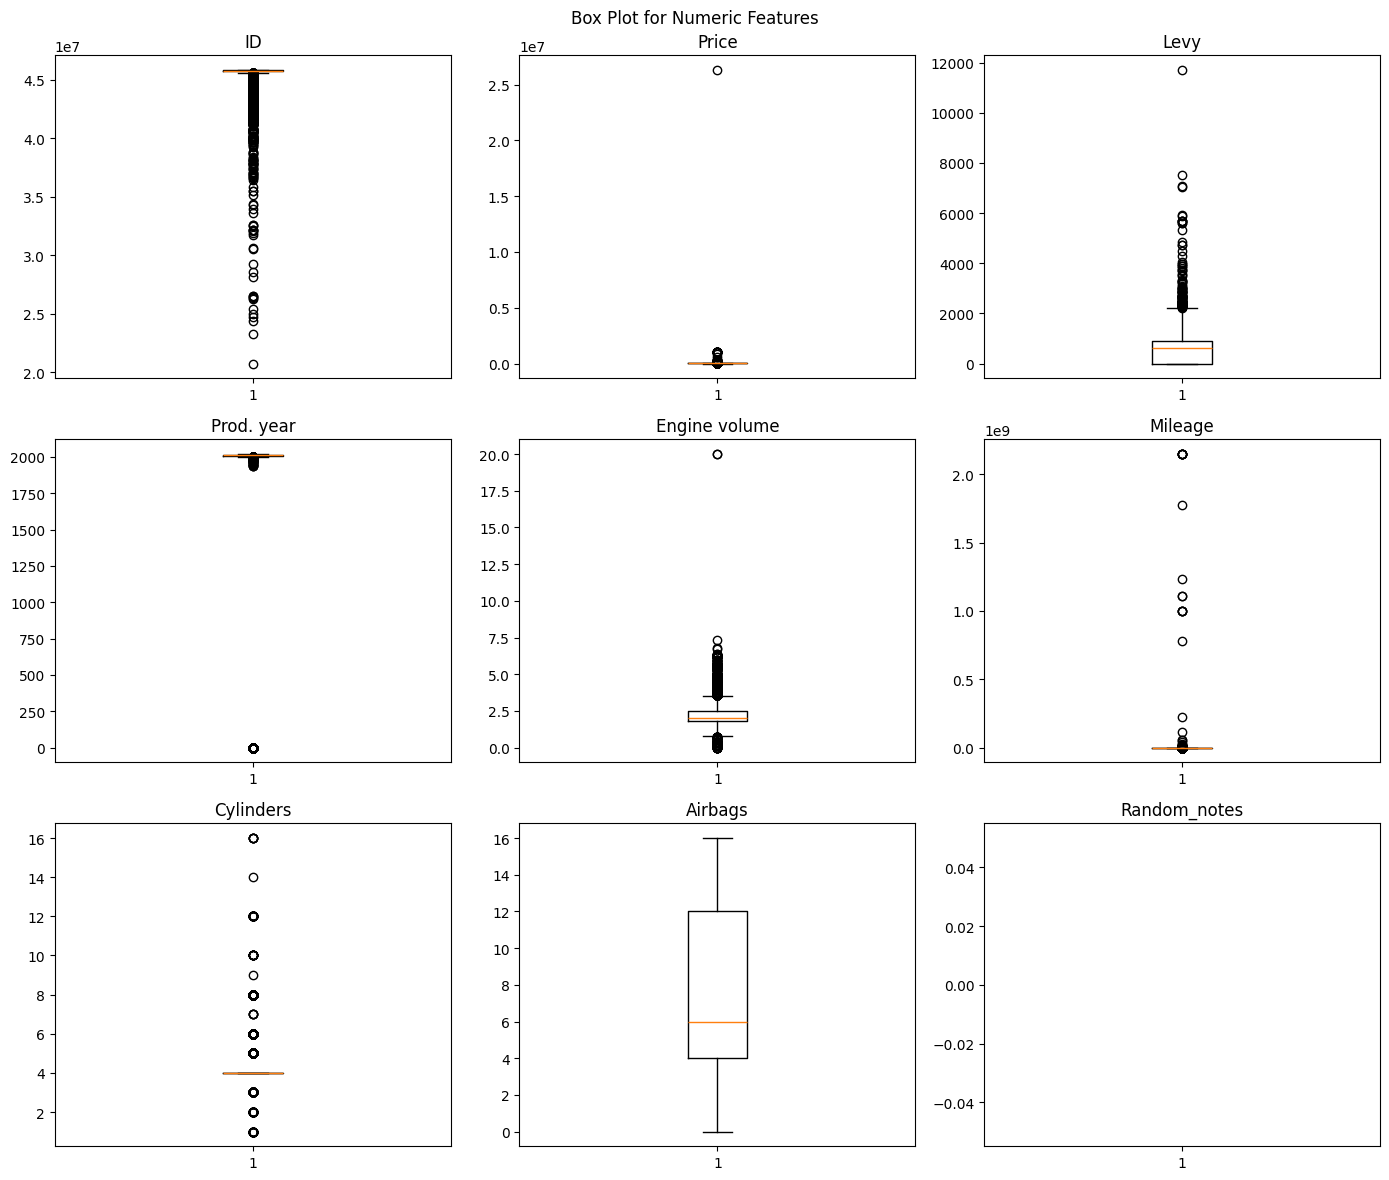

In [23]:
numeric_cols = car_sales.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(3,3, figsize=(14,12))

axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(car_sales[col])
    axes[i].set_title(col)


plt.suptitle("Box Plot for Numeric Features")
plt.tight_layout()
plt.show()


### Handle outliers

1) cap outlier to acceptable limit

In [24]:
def cap_outliers_iqr(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        df[col] = df[col].astype('float64')
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df[col] = df[col].clip(lower, upper)
        
        if 'int' in str(df[col].dtype):
            df[col] = df[col].round().astype('Int64')

    return df

df = car_sales[['Levy', 'Prod. year', 'Engine volume']]

df_copy = df.copy()
df_copy = cap_outliers_iqr(df_copy)
print(df_copy.shape)

(19097, 3)


2) remove outliers

In [25]:
def remove_outliers_iqr(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower) & (df[col] <= upper)]
    
    return df

df = car_sales[['Levy', 'Prod. year', 'Engine volume']]
df_copy1 = df.copy()
df_copy1 = remove_outliers_iqr(df_copy1)
print(df_copy1.shape)

(16098, 3)


In [27]:
feats = ['Levy', 'Prod. year', 'Engine volume']
car_sales[feats] = cap_outliers_iqr(car_sales[feats])

C:\Users\pc\AppData\Local\Temp\ipykernel_15692\2968526153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('float64')
C:\Users\pc\AppData\Local\Temp\ipykernel_15692\2968526153.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower, upper)
C:\Users\pc\AppData\Local\Temp\ipykernel_15692\2968526153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

### Remove useless features

remove id feature

In [29]:
car_sales.drop('ID', axis=1, inplace=True)

remove Random_notes feature

In [30]:
car_sales.drop('Random_notes', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)  

- Target Analysis
- Discrete Analysis
- Continuous  Analysis
- Categorical Analysis

### Target Analysis

In [31]:
def feat_info(col):
    print(f'Data Type of {col} : {car_sales[col].dtype}')

    if pd.api.types.is_numeric_dtype(car_sales[col]):
        print(f'Min value : {car_sales[col].min()}')
        print(f'Max value : {car_sales[col].max()}')
        print(f'Skewness value : {car_sales[col].skew()}')
        print(f'std value : {car_sales[col].std()}')

    len_unique_values = len(car_sales[col].unique())
    print(f'number of unique values : {len_unique_values}')

    if(len_unique_values <= 20):
        print(f'{car_sales[col].value_counts()}')

In [32]:
feat_info('Price')

Data Type of Price : int64
Min value : -5000
Max value : 26307500
Skewness value : 129.39492895108427
std value : 194541.0763056336
number of unique values : 2312


In [33]:
car_sales = car_sales[car_sales['Price'] > 0 ]
print(car_sales['Price'].min())

1


figure distribution for the price feature  
show boxplot to show the outlier

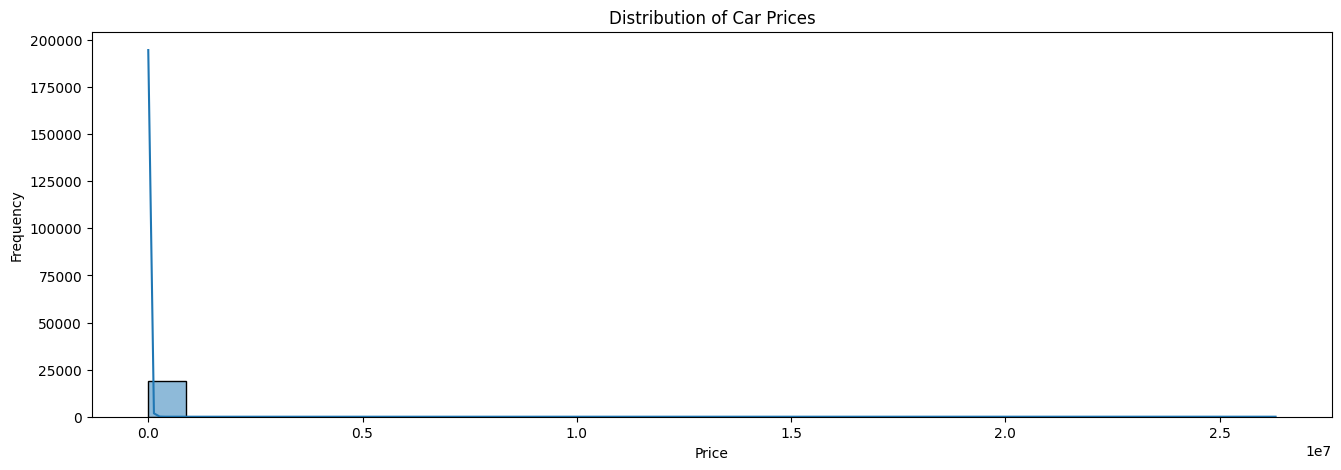

In [34]:
plt.figure(figsize=(16, 5))
sns.histplot(car_sales['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

the prices are left skew for range 0:200000  
there are outlier prices, some very low price and very high price

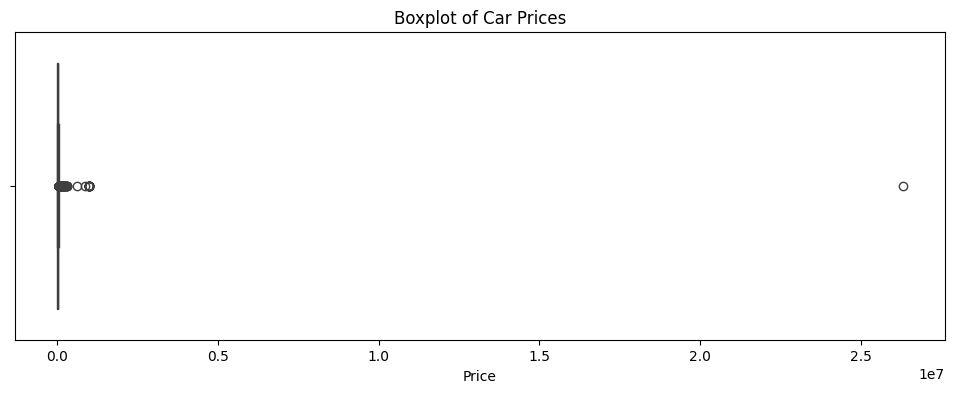

In [35]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=car_sales['Price'])
plt.title('Boxplot of Car Prices')
plt.show()

In [36]:
discrete_features, continous_features = [], []
numeric_feats = car_sales.select_dtypes(include=['number']).columns

for feat in numeric_feats:
    if len(car_sales[feat].unique()) <= 20:
        discrete_features.append(feat)
    else:
        continous_features.append(feat)

print(f'Discrete Features : {discrete_features}')
print(f'Continous Features : {continous_features}')

Discrete Features : ['Cylinders', 'Airbags']
Continous Features : ['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage']


### Discrete Features Analysis

#### Cylinders Analysis

In [38]:
feat_info('Cylinders')

Data Type of Cylinders : Int64
Min value : 1
Max value : 16
Skewness value : 2.110666795175777
std value : 1.2006459120343018
number of unique values : 13
Cylinders
4     14269
6      3402
8       983
5       170
3       107
2        42
12       39
1        37
10       12
16        5
7         4
9         1
14        1
Name: count, dtype: Int64


In [ ]:
def group_by(col, fun, ascend=False):
    group_fun = car_sales.groupby(col)['Price'].agg(fun).reset_index()
    return group_fun    



In [58]:
Cylinders_group_mean = group_by('Cylinders', 'mean')
Cylinders_group_mean.sort_values(by='Price', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds', subset=['Price'])

,Cylinders,Price
0,12,64097.282051
1,1,43566.945946
2,10,31486.666667
3,8,30192.976602
4,4,19885.412853
5,16,17519.800000
6,6,16650.067901
7,14,15681.000000
8,5,14620.505882
9,2,10358.404762


In [59]:
Cylinders_group_max = group_by('Cylinders', 'max')
Cylinders_group_max.sort_values(by='Price', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds', subset=['Price'])

,Cylinders,Price
0,4,26307500
1,1,1000000
2,8,1000000
3,12,1000000
4,6,308906
5,5,90947
6,10,50178
7,3,46414
8,16,39829
9,2,30577


C:\Users\pc\AppData\Local\Temp\ipykernel_15692\2182063127.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Cylinders_group_mean, x='Cylinders', y='Price', palette='Reds', ax=axes[0])
C:\Users\pc\AppData\Local\Temp\ipykernel_15692\2182063127.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Cylinders_group_max, x='Cylinders',y='Price', palette='Reds' , ax=axes[1])


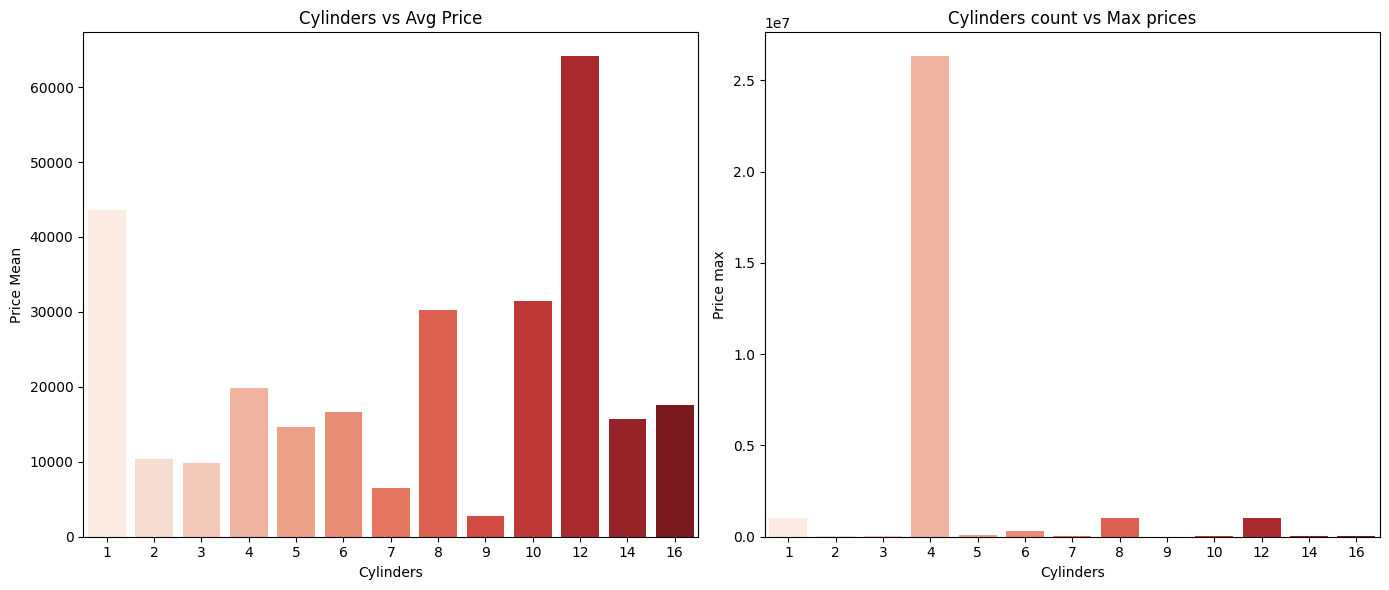

In [61]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

sns.barplot(data=Cylinders_group_mean, x='Cylinders', y='Price', palette='Reds', ax=axes[0])
axes[0].set_title("Cylinders vs Avg Price")
axes[0].set_xlabel("Cylinders")
axes[0].set_ylabel("Price Mean")

sns.barplot(data=Cylinders_group_max, x='Cylinders',y='Price', palette='Reds' , ax=axes[1])
axes[1].set_title("Cylinders count vs Max prices")
axes[1].set_xlabel("Cylinders")
axes[1].set_ylabel("Price max")


plt.tight_layout()
plt.show()

4 cylinders has the most frequency and the highest avg price  

#### Airbags Analysis

In [62]:
feat_info('Airbags')

Data Type of Airbags : int64
Min value : 0
Max value : 16
Skewness value : 0.0877566348429506
std value : 4.320956997101106
number of unique values : 17
Airbags
4     5786
12    5574
0     2400
8     1580
6     1301
2     1060
10     848
5      105
16      93
7       85
1       78
9       63
3       37
11      33
14      20
15       7
13       2
Name: count, dtype: int64


In [67]:
Airbags_sum_group = group_by('Airbags', 'sum')
Airbags_sum_group.sort_values(by='Price', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds', subset=['Price'])

,Airbags,Price
0,4,139527642
1,12,81880391
2,0,60426442
3,8,32030108
4,6,22312354
5,10,19484292
6,2,13141042
7,16,3470643
8,7,1404296
9,9,1272992


In [68]:
Airbags_count_group = group_by('Airbags', 'count')
Airbags_count_group.sort_values(by='Price', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds', subset=['Price'])

,Airbags,Price
0,4,5786
1,12,5574
2,0,2400
3,8,1580
4,6,1301
5,2,1060
6,10,848
7,5,105
8,16,93
9,7,85


- 4 & 12 airbags has the highest price avg and count  
- 0 airbag has high average price and high count cars ***that's strange***

C:\Users\pc\AppData\Local\Temp\ipykernel_15692\1649543955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Airbags_sum_group, x='Airbags', y='Price', palette='Reds')


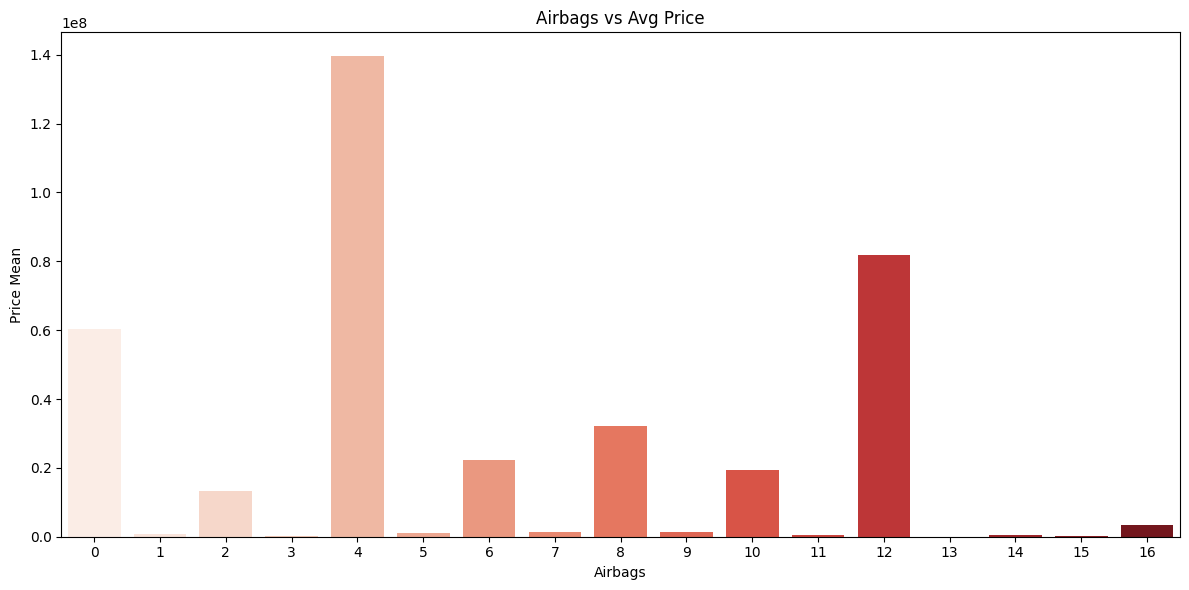

In [76]:

plt.figure(figsize=(12,6))

sns.barplot(data=Airbags_sum_group, x='Airbags', y='Price', palette='Reds')
plt.title("Airbags vs Avg Price")
plt.xlabel("Airbags")
plt.ylabel("Price Mean")

plt.tight_layout()
plt.show()

In [79]:
continous_features

['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage']

let's visualize our target feature `Price` and see his distribution

In [ ]:
avg_price_by_manufacturer = car_sales.groupby(['Manufacturer'])['Price'].mean().reset_index()
avg_price_by_manufacturer=avg_price_by_manufacturer.sort_values(by='Price',ascending=False)
avg_price_by_manufacturer

,Manufacturer,Price
29,LAMBORGHINI,872946.000000
4,BENTLEY,197574.500000
42,OPEL,75561.736979
31,LAND ROVER,56789.558140
2,ASTON MARTIN,54000.000000
...,...,...
40,MOSKVICH,4609.000000
60,VAZ,4553.400000
63,ZAZ,3822.500000
48,ROVER,2433.333333


as we see the Manufacturer that has the heighest average price is `LAMBORGHINI`  
and we can see the gap between `LAMBORGHINI` and the secend `BENTLEY` it about 5 times

let's visualize the first and last 10 avg price 

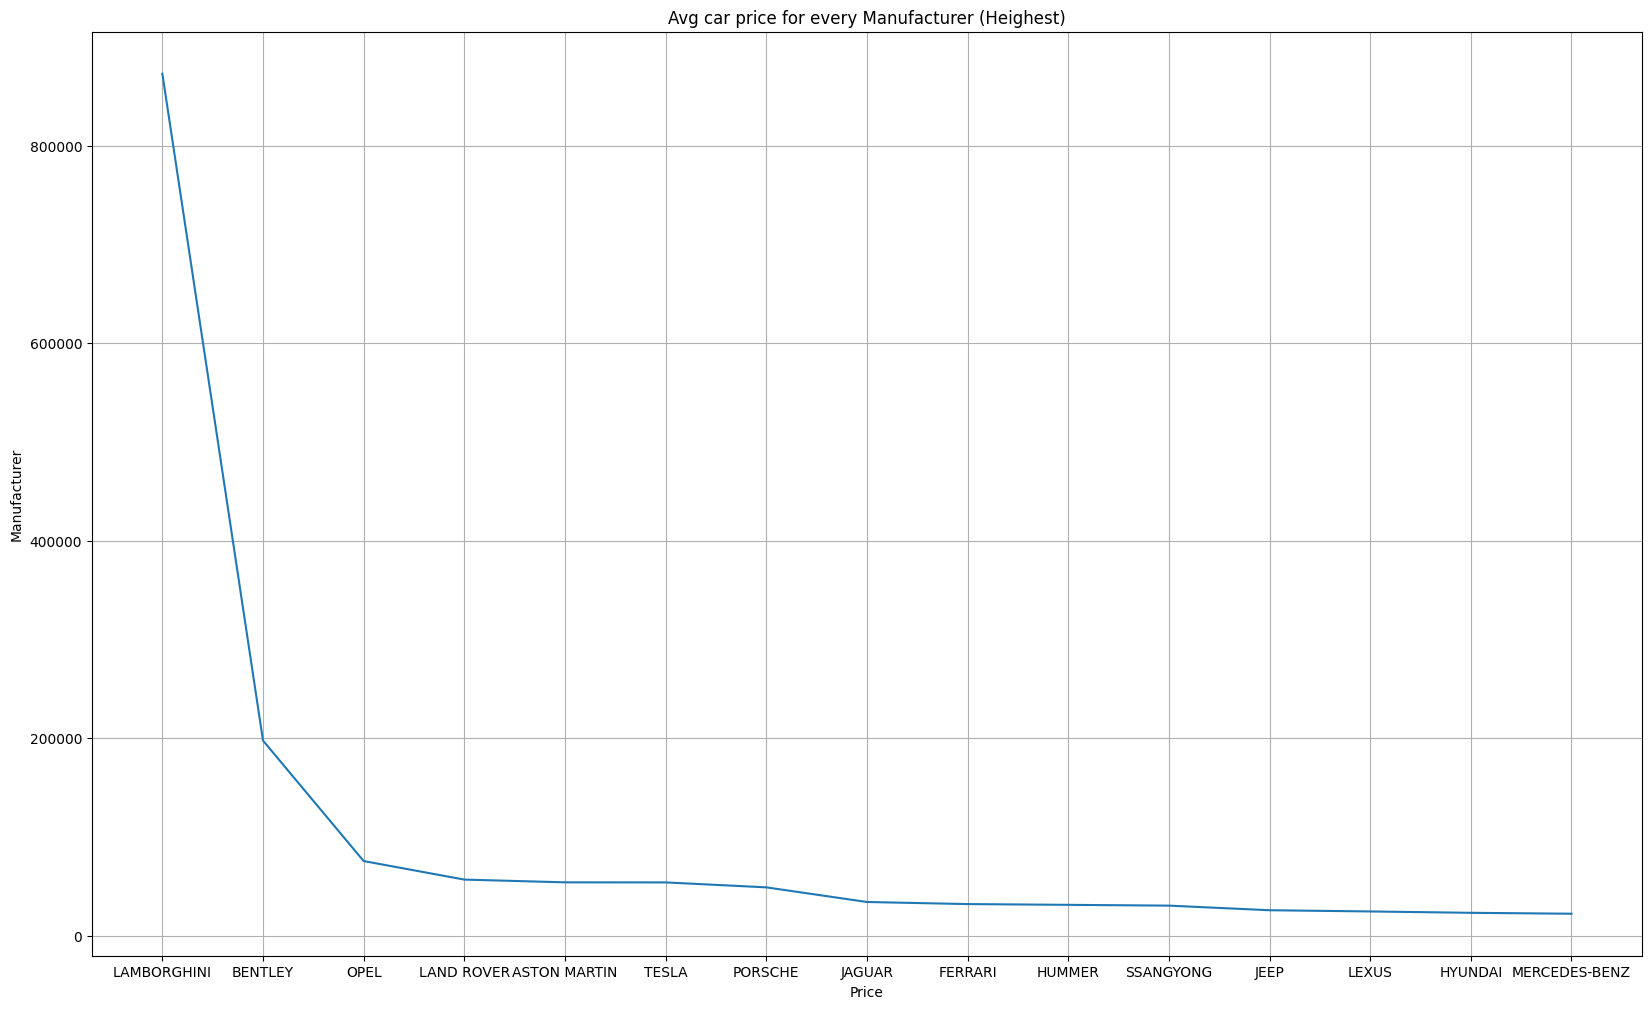

In [ ]:
sample_avg_price = avg_price_by_manufacturer.head(15)
plt.figure(figsize=(20,12))

plt.plot(sample_avg_price['Manufacturer'], sample_avg_price['Price'])
plt.xlabel('Price')
plt.ylabel('Manufacturer')
plt.title('Avg car price for every Manufacturer (Heighest)')

plt.grid()
plt.show()

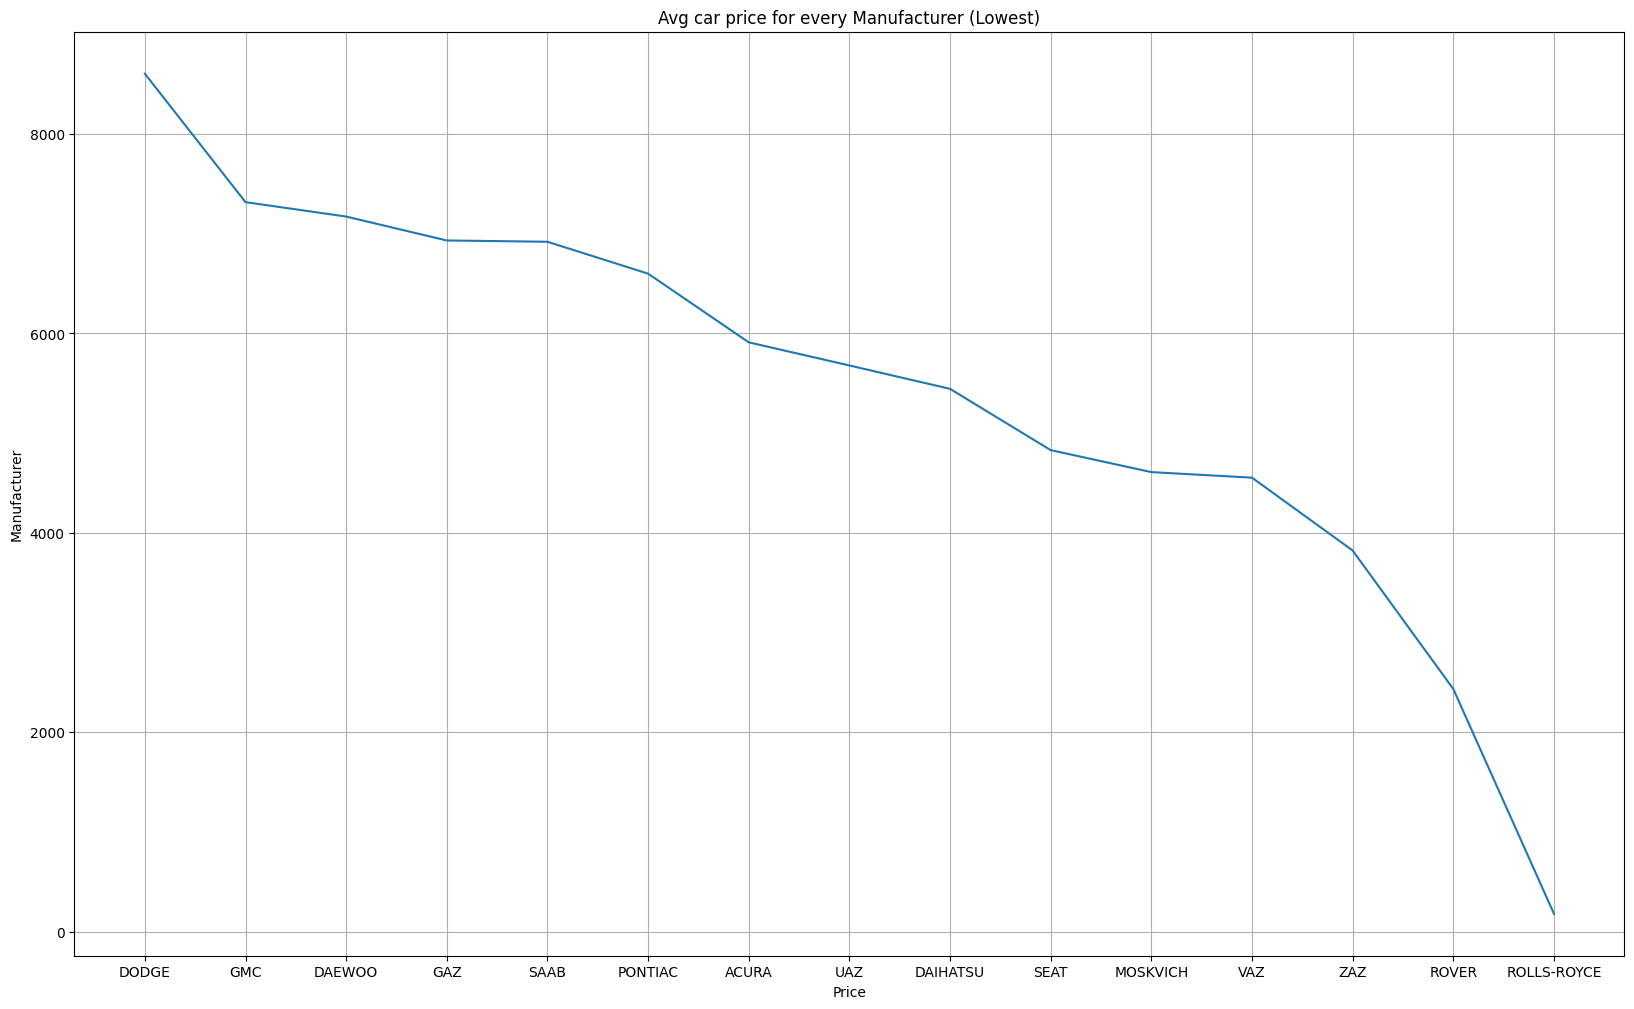

In [ ]:
sample_avg_price = avg_price_by_manufacturer.tail(15)
plt.figure(figsize=(20,12))

plt.plot(sample_avg_price['Manufacturer'], sample_avg_price['Price'])
plt.xlabel('Price')
plt.ylabel('Manufacturer')
plt.title('Avg car price for every Manufacturer (Lowest)')

plt.grid()
plt.show()

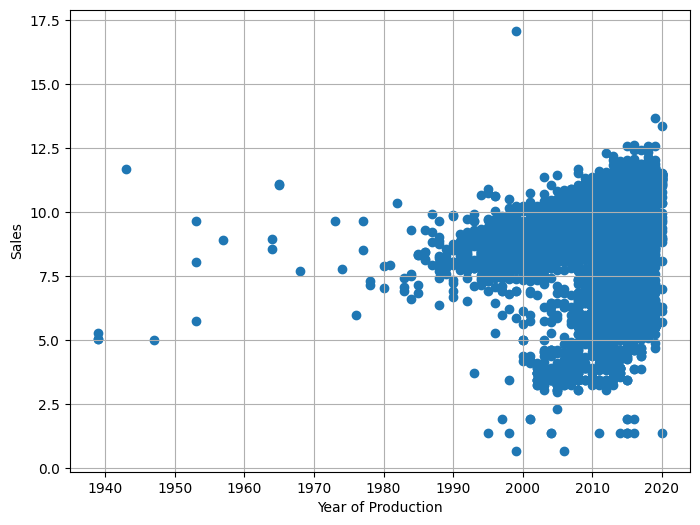

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(car_sales['Prod. year'],car_sales['log_price'])
plt.xlabel('Year of Production')
plt.ylabel('Sales')

plt.grid()
plt.show()

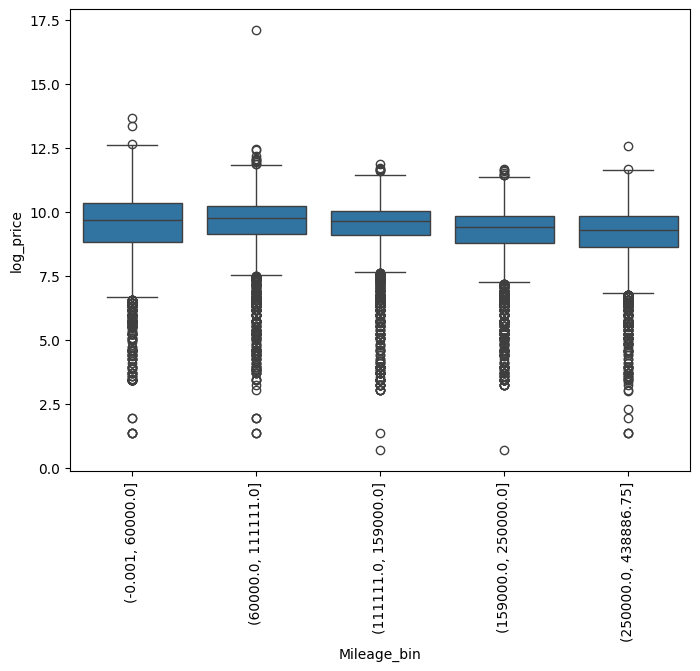

In [ ]:
plt.figure(figsize=(8,6))

car_sales['Mileage_bin'] = pd.qcut(car_sales['Mileage'], q=5)
sns.boxplot(x='Mileage_bin', y='log_price', data=car_sales)
plt.xticks(rotation=90)
plt.show()

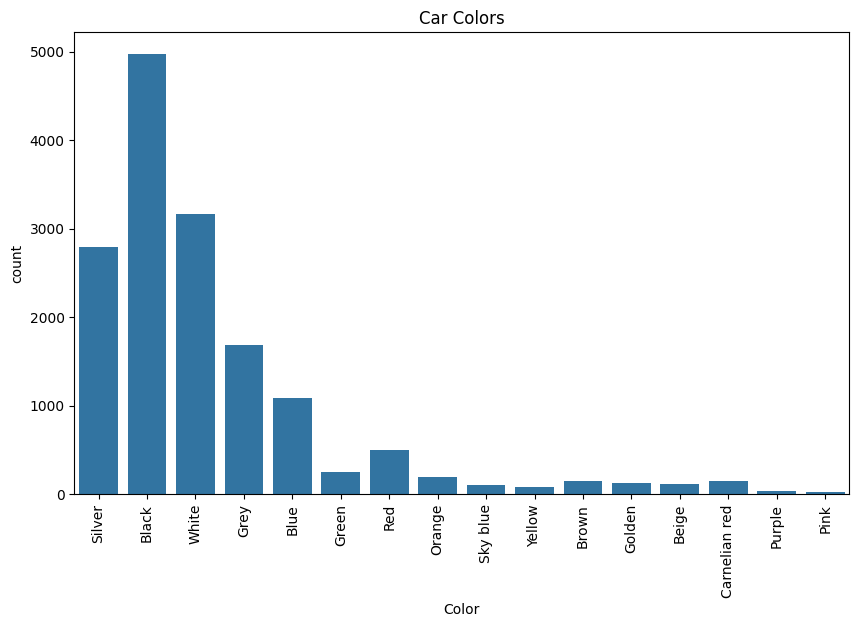

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x='Color',data=car_sales)
plt.title('Car Colors')
plt.xticks(rotation=90)
plt.show()